In [0]:
##################################################################################################
#Instalando Pacotes
##################################################################################################
!pip install Unidecode
##################################################################################################

In [0]:
##################################################################################################
#Importando pacotes a serem utilizados no projeto
##################################################################################################
import pandas as pd
import requests
import json
from pandas.io.json import json_normalize
from typing import List
from datetime import date, datetime
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from wordcloud import WordCloud
import unidecode
from unidecode import unidecode
import unicodedata
import re
import io
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
%matplotlib inline
lista_stop =  nltk.corpus.stopwords.words('portuguese')
##################################################################################################

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
##################################################################################################
#RemoveStopWords
#Stopwords são palavras comuns que normalmente não contribuem para o significado de uma frase, 
#pelo menos com relação ao propósito da informação e do processamento da linguagem natural
##################################################################################################

np.transpose(lista_stop)

#Adicionando novas StopWords
lista_stop.append('tao')
lista_stop.append('tudo')
lista_stop.append('ser')
lista_stop.append('sobre')	
lista_stop.append('do')
lista_stop.append('quais')
lista_stop.append('sao')
lista_stop.append('ter')
lista_stop.append('ate')
##################################################################################################


In [0]:
##################################################################################################
#Remoção de acentos.
##################################################################################################
def removerAcentosECaracteresEspeciais(palavra):
      # Unicode normalize transforma um caracter em seu equivalente em latin.
      nfkd = unicodedata.normalize('NFKD', palavra.replace("'",""))
      palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])
      # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
      return re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)
##################################################################################################


In [0]:
##################################################################################################
#Remoção de acentos e StopWords
##################################################################################################
def preprocess_Dataset_Treinamento(text):
   stemmer = nltk.stem.RSLPStemmer()
   frases_sem_Stemming = []

   for (palavras, sentimento, classificacao) in text:
     #com_Stemming = [str(stemmer.stem(p)) for p in removerAcentosECaracteresEspeciais(palavras).lower().split()  if p not in lista_stop]
     com_Stemming = [str(p) for p in removerAcentosECaracteresEspeciais(palavras).lower().split()  if p not in lista_stop]
     frases_sem_Stemming.append((com_Stemming,sentimento,classificacao))
   return frases_sem_Stemming
##################################################################################################

In [0]:
##################################################################################################
#Remoção de acentos e StopWords
##################################################################################################
def preprocess_Dataset_Noticias(text):
   stemmer = nltk.stem.RSLPStemmer()
   frases_sem_Stemming = []

   for (palavras) in text:
     #com_Stemming = [str(stemmer.stem(p)) for p in removerAcentosECaracteresEspeciais(palavras).lower().split()  if p not in lista_stop]
     com_Stemming = [str(p) for p in removerAcentosECaracteresEspeciais(palavras).lower().split() if p not in lista_stop]
     frases_sem_Stemming.append(' '.join(map(str, com_Stemming)))
   return frases_sem_Stemming
##################################################################################################

In [0]:
##################################################################################################
#Base de Treinamento Sentimento Noticias
##################################################################################################
#Dataset de treinamento retiraco dos seguintes sites:
#https://portaldobitcoin.com/
#https://cointimes.com.br/
#https://guiadobitcoin.com.br/
##################################################################################################
df = pd.read_csv('Base_Treinamento_Noticias.csv',encoding='utf-8', delimiter=';')
df.head().T
dados = [tuple(map(lambda x: str(x).replace('\xa0',' ') if type(x) == str else x, tup)) 
        for tup in tuple(tuple(x) for x in df.values.tolist())]
print(dados)
##################################################################################################


##################################################################################################
#Remoção de acentos e remove StopWords
##################################################################################################
retorno_base = preprocess_Dataset_Treinamento(dados)
##################################################################################################

##################################################################################################
#Criação do DataFrame
##################################################################################################
df_frases_com_Stem_treinamento = pd.DataFrame(retorno_base)
df_frases_com_Stem_treinamento.columns = ['Frase', 'Sentimento','Classificacao']
##################################################################################################

[('aproximar rapidamente', 'positiva', 1), ('halving halving alta sobe', 'positiva', 1), ('positivo', 'positiva', 1), ('positivamente', 'positiva', 1), ('superará máxima histórica', 'positiva', 1), ('máxima alta', 'positiva', 1), ('ganhando impulso', 'positiva', 1), ('ultrapassou o valor ', 'positiva', 1), ('superar ', 'positiva', 1), ('sobe', 'positiva', 1), ('reverteu subiu', 'positiva', 1), ('positivo', 'positiva', 1), ('positivamente', 'positiva', 1), ('máxima', 'positiva', 1), ('ganhando alta impulso', 'positiva', 1), ('ultrapassou o valor alta', 'positiva', 1), ('recorde de', 'positiva', 1), ('recuperação do valor', 'positiva', 1), ('subiu', 'positiva', 1), ('semana especial', 'positiva', 1), ('aumento reconhecimento reserva', 'positiva', 1), ('catalisador', 'positiva', 1), ('ótimo desempenho alta', 'positiva', 1), ('cruz de ouro', 'positiva', 1), ('otimismo', 'positiva', 1), ('probabilidade máximas históricas', 'positiva', 1), ('retorno investimento ', 'positiva', 1), ('longo pr

Tamanho da base de treinamento (Frases):  141


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


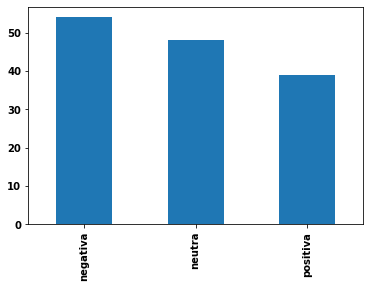

In [0]:
##################################################################################################
#Gráfico Barras
##################################################################################################
#Podemos observar que não temos o problema de desbalanceamento das classes.
print('Tamanho da base de treinamento (Frases): ', format(df_frases_com_Stem_treinamento.shape[0]))
df_frases_com_Stem_treinamento.Sentimento.value_counts().plot(kind='bar')
##################################################################################################

In [0]:
##################################################################################################
#Dataframe informações gerais dos dados
##################################################################################################
print((df_frases_com_Stem_treinamento.Sentimento.value_counts() / df_frases_com_Stem_treinamento.shape[0]) * 100)
df_frases_com_Stem_treinamento.sample(n=1)
display(df_frases_com_Stem_treinamento)
##################################################################################################

negativa    38.297872
neutra      34.042553
positiva    27.659574
Name: Sentimento, dtype: float64


Frase Sentimento  Classificacao
0           [aproximar, rapidamente]   positiva              1
1     [halving, halving, alta, sobe]   positiva              1
2                         [positivo]   positiva              1
3                    [positivamente]   positiva              1
4      [superara, maxima, historica]   positiva              1
..                               ...        ...            ...
136               [moedas, exchange]     neutra              2
137        [arrecadar, ajudar, doar]     neutra              2
138           [coronavirus, combate]     neutra              2
139  [mercado, coronavirus, combate]     neutra              2
140           [coronavirus, combate]     neutra              2

[141 rows x 3 columns]

In [0]:
##################################################################################################
todas_Palavras = []
def busca_Palavras(frase):
	for (palavras, sentimento, classificacao) in frase:
		todas_Palavras.extend(palavras)
	return todas_Palavras
##################################################################################################

In [0]:
##################################################################################################
#Retorno do total da base de treinamento
##################################################################################################
retorno_busca_palavras = busca_Palavras(retorno_base)

palavras_treinamento = []

for palavra in retorno_busca_palavras:
	palavras_treinamento.append(palavra)

print("Quantidade de palavras na base de treinamento {}".format(pd.DataFrame(palavras_treinamento).count()))
##################################################################################################

Quantidade de palavras na base de treinamento 0    293
dtype: int64


In [0]:
##################################################################################################
#Quantidade de vezes que uma palavra aparece no Dataset de Treinamento
##################################################################################################
def busca_frequencia(palavras):
	palavras = nltk.FreqDist(palavras)
	return palavras
	
freq = busca_frequencia(palavras_treinamento)
pd.DataFrame(list(freq.items()), columns = ["Palavra","Frequencia"])
##################################################################################################

Palavra  Frequencia
0      aproximar           1
1    rapidamente           1
2        halving           3
3           alta           6
4           sobe           3
..           ...         ...
114  mineradores           2
115      mineram           2
116    arrecadar           3
117         doar           3
118      mercado           1

[119 rows x 2 columns]

In [0]:
##################################################################################################
#Tokenização
#É o processo de tokenizar ou dividir uma string ou textos em uma lista de tokens. 
#O tokenizador  usa o espaço para separara as palavras.
##################################################################################################
def tokenização(lista) -> List:
    novalista: List = []
    for a in lista:
      for b in a[0]:
        palavras = nltk.FreqDist(b)
        novalista.append((b,str(a[1]),a[2]))   
    return novalista

teste = retorno_base

r = tokenização(teste)

df_frases_com_Stem_treinamento_Teste = pd.DataFrame(r)
df_frases_com_Stem_treinamento_Teste.columns = ['Frase', 'Sentimento','Classificacao']

#df_frases_com_Stem_treinamento_Teste.drop_duplicates(subset ="Frase", keep = False, inplace = True) 

display(df_frases_com_Stem_treinamento_Teste)
##################################################################################################

Frase Sentimento  Classificacao
0      aproximar   positiva              1
1    rapidamente   positiva              1
2        halving   positiva              1
3        halving   positiva              1
4           alta   positiva              1
..           ...        ...            ...
288      mercado     neutra              2
289  coronavirus     neutra              2
290      combate     neutra              2
291  coronavirus     neutra              2
292      combate     neutra              2

[293 rows x 3 columns]

In [0]:
##################################################################################################
#Função para retornar somente as palavras únicas
##################################################################################################
def busca_palavras_unicas(frequencia):
	freq = frequencia.keys()
	return freq

palavras_unicas_treinamento = busca_palavras_unicas(freq)
print(palavras_unicas_treinamento)
##################################################################################################

dict_keys(['aproximar', 'rapidamente', 'halving', 'alta', 'sobe', 'positivo', 'positivamente', 'superara', 'maxima', 'historica', 'ganhando', 'impulso', 'ultrapassou', 'valor', 'superar', 'reverteu', 'subiu', 'recorde', 'recuperacao', 'semana', 'especial', 'aumento', 'reconhecimento', 'reserva', 'catalisador', 'otimo', 'desempenho', 'cruz', 'ouro', 'otimismo', 'probabilidade', 'maximas', 'historicas', 'retorno', 'investimento', 'longo', 'prazo', 'valorizacao', 'evolucao', 'retoma', 'forca', 'aumentando', 'lucros', 'otimistas', 'aumentara', 'nivel', 'imprimir', 'dinheiro', 'bom', 'empurrar', 'resistencia', 'correcao', 'caiu', 'corrigir', 'forte', 'simetrico', 'bearish', 'perda', 'lta', 'perca', 'suporte', 'suportes', 'risco', 'volatilidade', 'arriscado', 'pessimista', 'cair', 'abaixo', 'pior', 'liquidados', 'derretendo', 'despencar', 'despencou', 'flash', 'crash', 'venda', 'queda', 'baixa', 'menor', 'acumula', 'desvalorizacao', 'realizando', 'derrubando', 'despencousuporte', 'repentina'

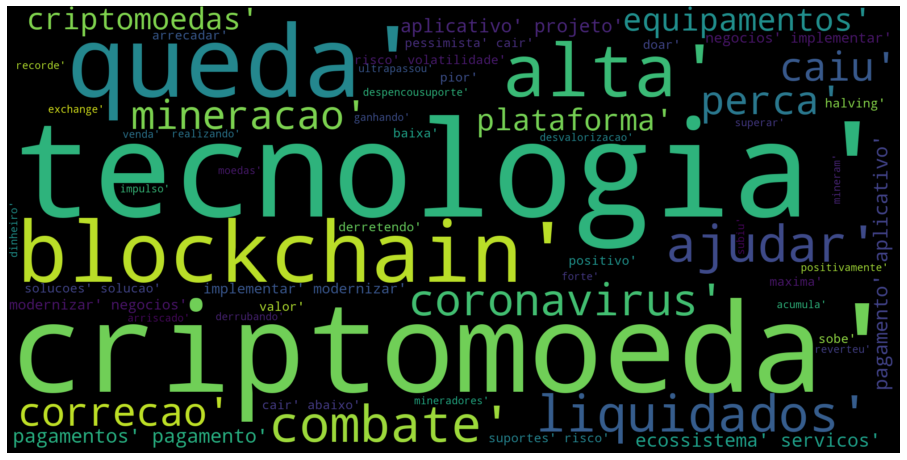

In [0]:
##################################################################################################
#IMPLEMENTAÇÃO NUVEM PALAVRAS JÁ TRADAS
##################################################################################################
words = []
for i in todas_Palavras:
    words.append(i)

words = (str(words))

wordcloud = WordCloud(min_font_size = 20, 
                      max_font_size = 300,
                      width = 2000,
                      height = 1000,
                      mode = "RGB").generate(words)
plt.figure(figsize = (16,9))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()
##################################################################################################

In [0]:
##################################################################################################
#Convertemos Frase para uma matriz sparsa, e logo após imprimimos o vocabulário do CountVectorizer.
#com bigrama ngram_range (1,2) agrupamento de palavras
##################################################################################################
treinamento = pd.DataFrame(df_frases_com_Stem_treinamento_Teste['Frase'])
treinamento.columns = ['Palavra']

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words=None,ngram_range = (1,2),
                        tokenizer = token.tokenize)
text_counts = cv.fit_transform(treinamento['Palavra'])
#cv.vocabulary_
##################################################################################################


In [0]:
##################################################################################################
#Treina o modelo
#Agora vamos aplicar o tipo de aprendizado supervisionado, usando o Naive Bayes – MultinomiaNB, 
#aplicamos o treino e fazemos um predict dos dados de teste.
##################################################################################################
X_train, X_test, y_train, y_test = train_test_split(text_counts, 
                                                     df_frases_com_Stem_treinamento_Teste['Classificacao'],
                                                     test_size=0.34, random_state=1,shuffle=True)
clf = MultinomialNB().fit(X_train, y_train)
y_predicted = clf.predict(X_test)
##################################################################################################

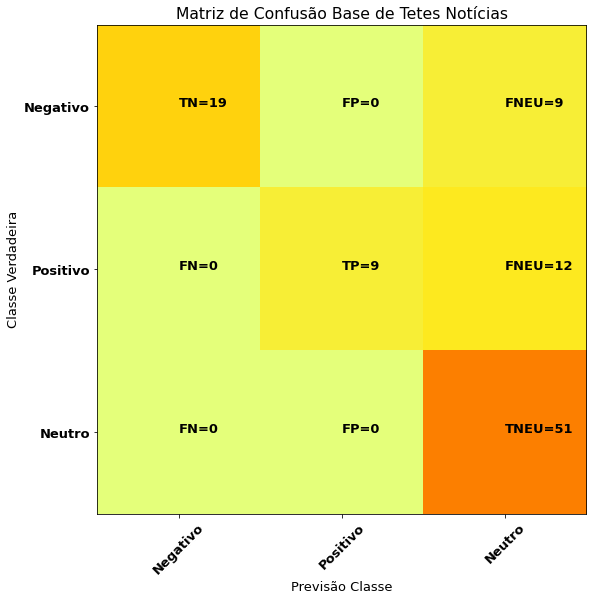

In [0]:
##################################################################################################
#Matriz de confusão:
#Para ter uma visão mais clara dos erros e sentimentos que estão em conflito no nosso modelo, 
##################################################################################################
font = {'family' : 'normal',
	      'weight' : 'bold',
	      'size'	 :  13}
plt.rc('font',**font)

cm = metrics.confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(14,9))
plt.clf()
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Wistia)
classNames = ['Negativo','Positivo','Neutro']
plt.title('Matriz de Confusão Base de Tetes Notícias')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Previsão Classe')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP','FNEU'],['FN','TP','FNEU'],['FN','FP','TNEU']]

for i in range(3):
  for j in range(3):
    plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]))
plt.show()
##################################################################################################

In [0]:
##################################################################################################
#Acuracia do modelo
##################################################################################################
print("MultinomialNB Accuracy: ",metrics.accuracy_score(y_test,y_predicted).round(3))
##################################################################################################
#podemos considerar um resultado razoável 
#se levarmos em consideração o tamanho da amostra e a quantidade de labels (sentimentos), 
##################################################################################################

MultinomialNB Accuracy:  0.79


In [0]:
##################################################################################################
#Testando o Modelo Analise de Sentimento
##################################################################################################
palavras_treino = cv.fit_transform(treinamento['Palavra'])

classificacao_treino = df_frases_com_Stem_treinamento_Teste['Classificacao']
modelo = MultinomialNB()
modelo.fit(palavras_treino,classificacao_treino)

##################################################################################################

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
##################################################################################################
#Consultando API Json externo de notícias de Bitcoin para Análise de Sentimento
##################################################################################################

#Notícias Bitcoin Cointelegraph

url = 'https://api.rss2json.com/v1/api.json?rss_url=https%3A%2F%2Fcointelegraph.com.br%2Frss%2Ftag%2Fbitcoin'

result =  requests.get(url).json()
df = pd.DataFrame.from_dict([x[1] for x in result.items()][2])['title']
df.drop_duplicates() 
noticias = [x[1] for x in df.items()]
noticias_tratadas = preprocess_Dataset_Noticias(noticias)

##################################################################################################

#Notícias Bitcoin Bitcoinnews

url2 = 'https://api.rss2json.com/v1/api.json?rss_url=https://bitcoinnews.com.br/feed'

result2 =  requests.get(url2).json()
df2 = pd.DataFrame.from_dict([x[1] for x in result2.items()][2])['title']
df2.drop_duplicates() 
noticias2 = [x[1] for x in df2.items()]
noticias_tratadas2 = preprocess_Dataset_Noticias(noticias2)
print("Todas as Notícias Externas Tratadas: ")
todas_noticias_tratadas = noticias_tratadas + noticias_tratadas2
print(todas_noticias_tratadas)
freq_testes = cv.transform(todas_noticias_tratadas)

##################################################################################################


Todas as Notícias Externas Tratadas: 
['qr capital anuncia fim exchange concentrar fundo 100 cripto regulado cvm', 'porque analise dados nao financeiros bitcoin importante', 'modelo stocktoflow traz previsao bitcoin pode comecar escalada atingir us 288 mil', 'hashrate bitcoin cai 30 sinal alta dizem especialistas', 'uso pagamentos digitais dispara junto adocao bitcoin america latina', 'mercado perpetuo bitcoin entra operacao exchange descentralizada', 'bitcoin dobro ganhos ouro 2020 agora', 'cliente bloqueia dinheiro carro antigo negocio ligado genbit criado antes bitcoin', 'fique olho bitcoin ouro prata recomenda multimilionario bill pulte', 'halving bitcoin nao apocaliptico alguns temiam comunidade cripto', 'youtube suspende canal cto ripple semana apos empresa processar plataforma', 'binance realizara conferencia portugues falar binance futures', 'confianca europeus uso criptomoedas aumenta ano apos ano', 'razao coronavirus pib eua recua 48 1o trimestre', 'milionario preso sob suspe

In [0]:
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

[0 1 2]


array([[0.17, 0.16, 0.67],
       [0.22, 0.21, 0.57],
       [0.22, 0.21, 0.57],
       [0.1 , 0.69, 0.21],
       [0.08, 0.08, 0.84],
       [0.08, 0.09, 0.83],
       [0.2 , 0.39, 0.41],
       [0.17, 0.49, 0.34],
       [0.2 , 0.39, 0.41],
       [0.14, 0.56, 0.29],
       [0.12, 0.24, 0.63],
       [0.28, 0.26, 0.46],
       [0.12, 0.11, 0.77],
       [0.1 , 0.1 , 0.8 ],
       [0.04, 0.04, 0.91],
       [0.28, 0.26, 0.46],
       [0.59, 0.12, 0.29],
       [0.28, 0.26, 0.46],
       [0.07, 0.07, 0.86],
       [0.12, 0.11, 0.77]])

In [0]:
##################################################################################################
#Declaração das variáveis das classificações
##################################################################################################
possibilidade_noticias_dia_positiva = 0
possibilidade_noticias_dia_negativa = 0
possibilidade_noticias_dia_neutra = 0
##################################################################################################


##################################################################################################
#Peso estipulado para cada tipo de classificação, para tirar a média geral das noticias analisadas
#no dia, e estipular o sentimento do mercado.
#Foi estipulado o peso 3 para as noticias negativas
##################################################################################################
peso_noticia_negativa = 3
peso_noticia_positiva = 2
peso_noticia_neutra = 1
##################################################################################################


##################################################################################################
# Fazendo a classificação com o modelo treinado:
##################################################################################################
list_classificacao = []
for t, c in zip (noticias_tratadas,modelo.predict(freq_testes)):
    # t representa o noticia e c a classificação de cada noticia.
    #print (t +", "+ str(c))
    s = ''

    if c == 0:
      possibilidade_noticias_dia_negativa = possibilidade_noticias_dia_negativa + (1 * peso_noticia_negativa)
      s = 'negativa'
    if c == 1:
      possibilidade_noticias_dia_positiva = possibilidade_noticias_dia_positiva + (1 * peso_noticia_positiva)
      s = 'positiva'
    if c == 2:
      possibilidade_noticias_dia_neutra = possibilidade_noticias_dia_neutra + (1 * peso_noticia_neutra)
      s = 'neutra'

    list_classificacao.append([t,c,s])
##################################################################################################


##################################################################################################
#Calculando Média e Percentuais das Notícias Analisadas
##################################################################################################
total_possibilidade = possibilidade_noticias_dia_negativa + possibilidade_noticias_dia_positiva + possibilidade_noticias_dia_neutra

possibilidade_noticias_dia_negativa = (possibilidade_noticias_dia_negativa * 100) / total_possibilidade
possibilidade_noticias_dia_positiva = (possibilidade_noticias_dia_positiva * 100) / total_possibilidade
possibilidade_noticias_dia_neutra =   (possibilidade_noticias_dia_neutra * 100) / total_possibilidade

df_analise = pd.DataFrame(list_classificacao)
df_analise.columns = ['Frase', 'Classificacao','Sentimento']
display(df_analise)

df_result = pd.DataFrame()
df_result['positiva'] = [round(possibilidade_noticias_dia_positiva,2)]
df_result['negativa'] = [round(possibilidade_noticias_dia_negativa,2)]
df_result['neutra'] =   [round(possibilidade_noticias_dia_neutra,2)]
##################################################################################################

Frase  Classificacao Sentimento
0  qr capital anuncia fim exchange concentrar fun...              2     neutra
1  porque analise dados nao financeiros bitcoin i...              2     neutra
2  modelo stocktoflow traz previsao bitcoin pode ...              2     neutra
3  hashrate bitcoin cai 30 sinal alta dizem espec...              1   positiva
4  uso pagamentos digitais dispara junto adocao b...              2     neutra
5  mercado perpetuo bitcoin entra operacao exchan...              2     neutra
6               bitcoin dobro ganhos ouro 2020 agora              2     neutra
7  cliente bloqueia dinheiro carro antigo negocio...              1   positiva
8  fique olho bitcoin ouro prata recomenda multim...              2     neutra
9  halving bitcoin nao apocaliptico alguns temiam...              1   positiva

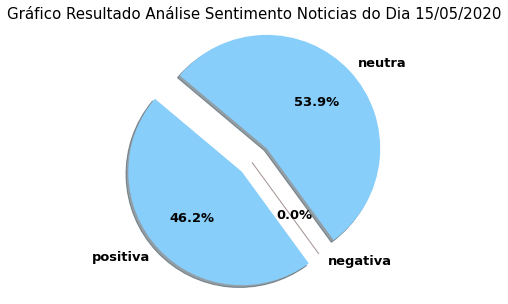

In [0]:
##################################################################################################
#Criando Gráfico de Análise de Sentimento
##################################################################################################
data_atual = date.today().strftime('%d/%m/%Y')

def generate_piechart(df_result):
  import matplotlib.pyplot as plt
  labels = df_result.columns.tolist()
  sizes = df_result.values.tolist()[0]
  color = ['lightskyblue','lightcoral']
  explode = (0.15, 0, 0.15)
  fig1, ax1 = plt.subplots(figsize=(5,5))
  ax1.pie(sizes, labels=labels, explode=explode,
          shadow=True, autopct='%1.1f%%', startangle=140, colors=color)
  ax1.set_title('Gráfico Resultado Análise Sentimento Noticias do Dia ' + str(data_atual), fontsize=15)
  ax1.axis('equal')
  plt.show()
generate_piechart(df_result)
##################################################################################################